<a href="https://colab.research.google.com/github/brunobobadilla06/Bruno-CienciaDeDatos/blob/main/Manejo_de_datos_faltantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clase: Manejo de Datos Ausentes en Data Science

Objetivo:
Comprender qué son los datos ausentes (missing data), por qué ocurren, cómo detectarlos y aprender diversas técnicas para manejarlos utilizando Python, Pandas y Scikit-learn.

Librerías Principales:

Pandas: Para manipulación y análisis de datos.

NumPy: Para operaciones numéricas y el manejo de NaN.

Matplotlib/Seaborn: Para visualización.

Missingno: Para visualización específica de datos ausentes.

Scikit-learn: Para técnicas de imputación más avanzadas.

1. Introducción: ¿Qué son los Datos Ausentes y por qué nos importan?

Los datos ausentes, a menudo representados como NaN (Not a Number), None, o simplemente celdas vacías en un conjunto de datos, son un problema común en el análisis de datos y el machine learning.

¿Por qué ocurren?

Errores en la recolección de datos (manual o automática).

Fusión de datasets con diferentes columnas o identificadores.

Respuestas no proporcionadas por los encuestados (e.g., preguntas sensibles).

Datos que no aplican a ciertos registros.

Fallos técnicos durante la transmisión o almacenamiento.

¿Por qué son un problema?

Muchos algoritmos de machine learning no pueden funcionar directamente con datos ausentes (e.g., regresión lineal, SVM, redes neuronales).

Pueden reducir el poder estadístico de un análisis.

Pueden introducir sesgos en los resultados si no se manejan adecuadamente.

Pueden llevar a conclusiones erróneas.

In [3]:
# Configuracion del entorno
# Importacion de librerias fundamentales
import pandas as pd
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria especializada en visulaizacion de datos ausentes
import missingno as msno

# Librerias de scikit-learn para imputacion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split # Para demostrar buenas practicas

# Configuracion adicionales (opcional)
pd.set_option('display.max_columns', None) # Mostrar todas las columnas
sns.set_style("whitegrid") # Configuracion de estilo para graficos
plt.rcParams['figure.figsize'] = (12, 8) # Tamaño de los graficos matplotlib

# Crear un diccionario con los datos
data ={
    'id_estudiante': range(1, 11),
    'Edad': [18, 19, 20, np.nan, 21, 22, 19, 20, 23, 18],
    'Nota_parcial1': [7.5, 8.0, 5.5, 6.0, 9.0, np.nan, 7.0, 8.5, np.nan, 6.5],
    'Nota_parcial2': [8.0, 8.5, 6.0, 6.5, 9.5, 7.0, 7.5, 9.0, 8.0, np.nan],
    'Aistencia_%': [90, 85, 70, 75, 95, 80, np.nan, 100, 88, 92],
    'Ciudad_origen': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', np.nan, 'Sevilla', 'Barcelona', 'Madrid', 'Madrid', 'Valencia'],
    'Beca_ACtiva': [True, False, True, False, True, True, False, True, False, True]

}

# Crear Dataframe
df = pd.DataFrame(data)
df

# Contar valores nulos por columna
print('Conteo de valores nulos por columna')
print(df.isnull().sum())

# Calcular el porcentaje de valores nulos por columna
print('\nPorcentaje de valores nulos por columna')
print(df.isnull().sum() / len(df) * 100)

Conteo de valores nulos por columna
id_estudiante    0
Edad             1
Nota_parcial1    2
Nota_parcial2    1
Aistencia_%      1
Ciudad_origen    1
Beca_ACtiva      0
dtype: int64

Porcentaje de valores nulos por columna
id_estudiante     0.0
Edad             10.0
Nota_parcial1    20.0
Nota_parcial2    10.0
Aistencia_%      10.0
Ciudad_origen    10.0
Beca_ACtiva       0.0
dtype: float64


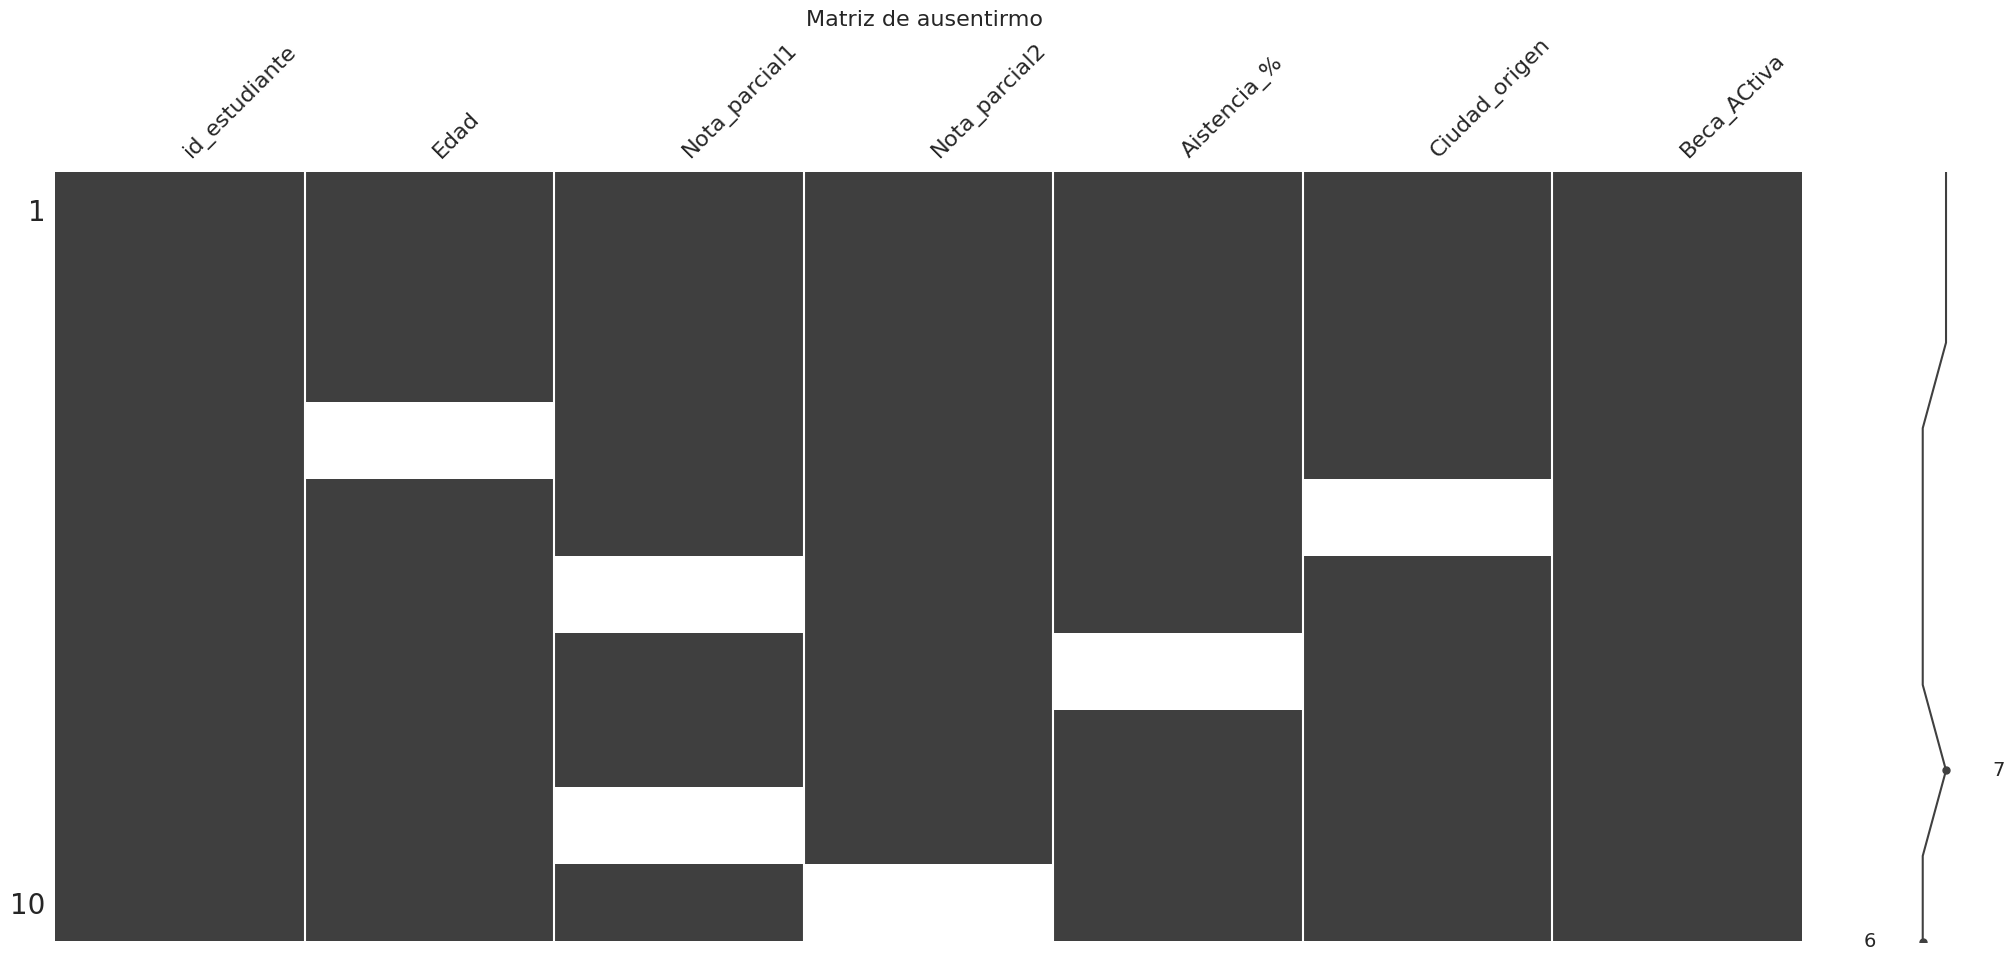

In [4]:
# Visualizacion de datos ausentes
# Matriz de ausentismo: Visualiza la ubicacion de los datos NaN
msno.matrix(df)
plt.title('Matriz de ausentirmo ', fontsize=16)
plt.show()

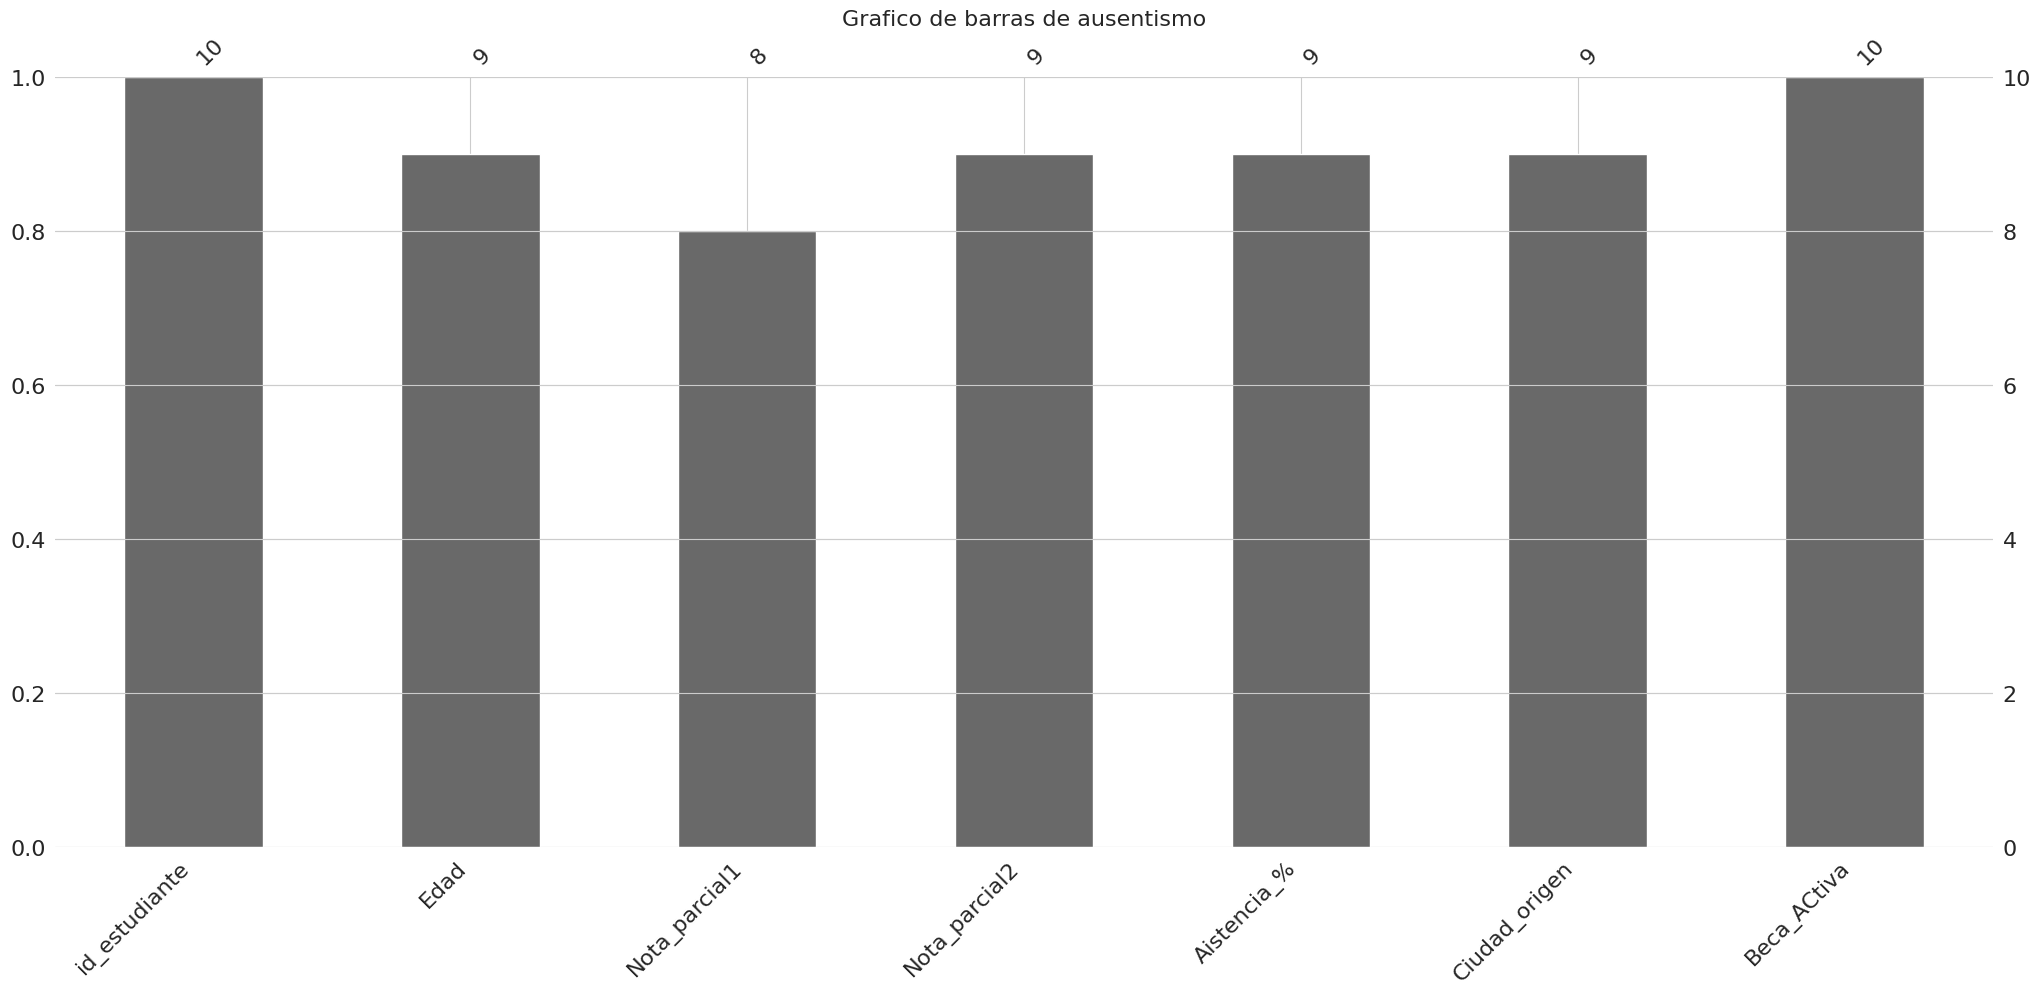

In [2]:
 # Configuracion del entorno
# Importacion de librerias fundamentales
import pandas as pd
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria especializada en visulaizacion de datos ausentes
import missingno as msno

# Librerias de scikit-learn para imputacion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split # Para demostrar buenas practicas

# Configuracion adicionales (opcional)
pd.set_option('display.max_columns', None) # Mostrar todas las columnas
sns.set_style("whitegrid") # Configuracion de estilo para graficos
plt.rcParams['figure.figsize'] = (12, 8) # Tamaño de los graficos matplotlib

# Crear un diccionario con los datos
data ={
    'id_estudiante': range(1, 11),
    'Edad': [18, 19, 20, np.nan, 21, 22, 19, 20, 23, 18],
    'Nota_parcial1': [7.5, 8.0, 5.5, 6.0, 9.0, np.nan, 7.0, 8.5, np.nan, 6.5],
    'Nota_parcial2': [8.0, 8.5, 6.0, 6.5, 9.5, 7.0, 7.5, 9.0, 8.0, np.nan],
    'Aistencia_%': [90, 85, 70, 75, 95, 80, np.nan, 100, 88, 92],
    'Ciudad_origen': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', np.nan, 'Sevilla', 'Barcelona', 'Madrid', 'Madrid', 'Valencia'],
    'Beca_ACtiva': [True, False, True, False, True, True, False, True, False, True]

}

# Crear Dataframe
df = pd.DataFrame(data)
df

 # Grafico de barras de ausentismo: similar a .isnull().sum() pero grafico
msno.bar(df)
plt.title('Grafico de barras de ausentismo', fontsize=16)
plt.show()

In [5]:
# Estrategias para manejar datos ausentes
# Existen varias formas de abordar de datos ausentes. La eleccion depende del contexto,
#la cantidad de datos faltanyes y el objetivo del analisis o modelo.
# Eliminacion de datos(Deletion)
# Es la estrategia mas simple, pero a menudo no la mas recomendable porque puede llevar a perdida de informacion
# Eliminacion por filas(Listwise deletion)
# Se eliminan todas las filas que contengan al menos un valor ausente
 # Configuracion del entorno
# Importacion de librerias fundamentales
import pandas as pd
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Libreria especializada en visulaizacion de datos ausentes
import missingno as msno

# Librerias de scikit-learn para imputacion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split # Para demostrar buenas practicas

# Configuracion adicionales (opcional)
pd.set_option('display.max_columns', None) # Mostrar todas las columnas
sns.set_style("whitegrid") # Configuracion de estilo para graficos
plt.rcParams['figure.figsize'] = (12, 8) # Tamaño de los graficos matplotlib

# Crear un diccionario con los datos
data ={
    'id_estudiante': range(1, 11),
    'Edad': [18, 19, 20, np.nan, 21, 22, 19, 20, 23, 18],
    'Nota_parcial1': [7.5, 8.0, 5.5, 6.0, 9.0, np.nan, 7.0, 8.5, np.nan, 6.5],
    'Nota_parcial2': [8.0, 8.5, 6.0, 6.5, 9.5, 7.0, 7.5, 9.0, 8.0, np.nan],
    'Aistencia_%': [90, 85, 70, 75, 95, 80, np.nan, 100, 88, 92],
    'Ciudad_origen': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', np.nan, 'Sevilla', 'Barcelona', 'Madrid', 'Madrid', 'Valencia'],
    'Beca_ACtiva': [True, False, True, False, True, True, False, True, False, True]

}

# Crear Dataframe
df = pd.DataFrame(data)
df

# Crear una copia para modificar el original
df_eliminado_filas = df.copy()

# Eliminar filas con cualquier valor NaN
df_eliminado_filas.dropna(axis=0, inplace=True) # axcis indica filas
print('Tamaño de DataFrame original: ', df.shape)
print('Tamaño de DataFrame con filas eliminadas: ', df_eliminado_filas.shape)
print('\nDataFrame con filas eliminadas')
df_eliminado_filas
#


Tamaño de DataFrame original:  (10, 7)
Tamaño de DataFrame con filas eliminadas:  (4, 7)

DataFrame con filas eliminadas


,id_estudiante,Edad,Nota_parcial1,Nota_parcial2,Aistencia_%,Ciudad_origen,Beca_ACtiva
0,1,18.0,7.5,8.0,90.0,Madrid,True
1,2,19.0,8.0,8.5,85.0,Barcelona,False
2,3,20.0,5.5,6.0,70.0,Valencia,True
7,8,20.0,8.5,9.0,100.0,Madrid,True


In [6]:
# Eliminacion por columnas(column Deletion)
# Crear una copia
df_eliminado_columnas = df.copy()

# Definir un umbral (ej: 30% de valores ausentes)
umbral = 0.3 * len(df_eliminado_columnas)

# Identificar columnas a eliminar
columnas_a_eliminar = df_eliminado_columnas.columns[df_eliminado_columnas.isnull().sum() > umbral]
print('Columnas a eliminar: ', columnas_a_eliminar.tolist())

# Eliminar las columnas
df_eliminado_columnas.drop(columns=columnas_a_eliminar, inplace=True)

print('Tamaño de DataFrame original: ', df.shape)
print('Tamaño despues de eliminar columnas con mayor a 30%: ', df_eliminado_columnas.shape)
print('\nDataFrame con columnas eliminadas')
df_eliminado_columnas


Columnas a eliminar:  []
Tamaño de DataFrame original:  (10, 7)
Tamaño despues de eliminar columnas con mayor a 30%:  (10, 7)

DataFrame con columnas eliminadas


,id_estudiante,Edad,Nota_parcial1,Nota_parcial2,Aistencia_%,Ciudad_origen,Beca_ACtiva
0,1,18.0,7.5,8.0,90.0,Madrid,True
1,2,19.0,8.0,8.5,85.0,Barcelona,False
2,3,20.0,5.5,6.0,70.0,Valencia,True
3,4,NaN,6.0,6.5,75.0,Madrid,False
4,5,21.0,9.0,9.5,95.0,NaN,True
5,6,22.0,NaN,7.0,80.0,Sevilla,True
6,7,19.0,7.0,7.5,NaN,Barcelona,False
7,8,20.0,8.5,9.0,100.0,Madrid,True
8,9,23.0,NaN,8.0,88.0,Madrid,False
9,10,18.0,6.5,NaN,92.0,Valencia,True
